# SALES PREDICTION 

## Import the Libraries

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## Load the dataset

In [22]:
ad_df = pd.read_csv('C:/Users/Deepak/OneDrive/Desktop/CodSoft/Task-04/advertising.csv')
ad_df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [23]:
ad_df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Data Pre-Processing

In [24]:
ad_df.isnull().sum()



TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## Feature Engineering

In [25]:
# Split the ad_df into features (X) and target variable (y)
X = ad_df[['TV', 'Radio', 'Newspaper']]
Y = ad_df['Sales']

## Split the data 

In [26]:
# split the datasets into training and testing sets
X_train,  X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 42)


## Train the Model

In [27]:
# Training the Liner Regression model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [28]:
Y_pred = model.predict(X_test)

In [29]:
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error : {mse}")

Mean Squared Error : 2.9077569102710896


## Exploratory Data Analysis (EDA)

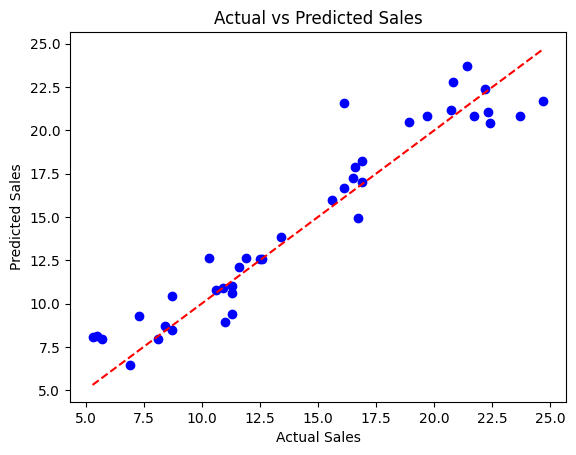

In [30]:
# Visualization 1: Scatter plot of Actual vs Predicted Sales
plt.scatter(Y_test, Y_pred, color='blue')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()


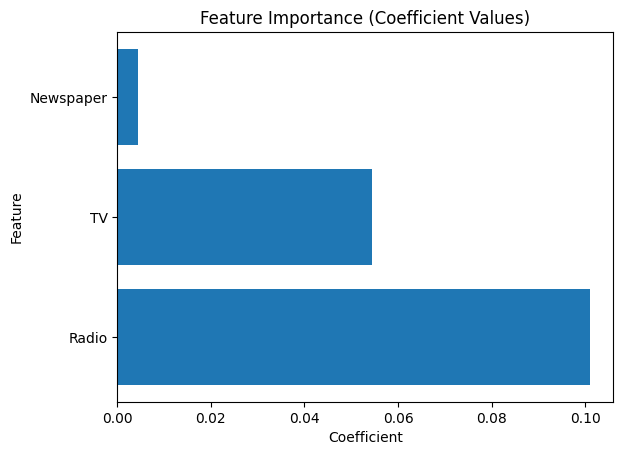

In [31]:
# Get the coefficients of the features
coefficients = model.coef_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient values to get feature importance
feature_importance_df['Absolute Coefficient'] = np.abs(feature_importance_df['Coefficient'])
feature_importance_df = feature_importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# Visualization 2: Bar plot of Feature Importance (Coefficient Values)
plt.barh(feature_importance_df['Feature'], feature_importance_df['Coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance (Coefficient Values)')
plt.show()

In [32]:
# Display feature importance DataFrame
print(feature_importance_df)

     Feature  Coefficient  Absolute Coefficient
1      Radio     0.100945              0.100945
0         TV     0.054509              0.054509
2  Newspaper     0.004337              0.004337


## Making Predictions

In [33]:
# Function to make predictions using a DataFrame
def predict_sales(df, model):
    X = df[['TV', 'Radio', 'Newspaper']]
    predictions = model.predict(X)
    return predictions

In [34]:
# Example of making predictions using a DataFrame
new_data = pd.DataFrame({'TV': [100, 200], 'Radio': [20, 30], 'Newspaper': [40, 50]})
predicted_sales = predict_sales(new_data, model)
print("Predicted Sales:")
print(predicted_sales)

Predicted Sales:
[12.35742661 18.86117378]
